In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdCoordGen
import pandas as pd
from IPython.display import SVG

DFT8K_mols =set()
with open(f'./cleaned_testing_dataset/DFT8K/molecule_list.txt', 'r') as file:
    DFT8K_molecules = [p.strip() for p in file.read().split(',')]
    for x in DFT8K_molecules:
        x=x.replace('sdf/', '')
        x=x.replace('.sdf', '')
        x='CHEMBL'+x
        DFT8K_mols.add(x)
fivea_mols = set()
with open(f'Data/cleaned_datasets/Data5a/Data5a_HCNF_scaled_nmredata/molecule_list.txt', 'r') as file:
    fivea_molecules = [p.strip() for p in file.read().split(',')]
    for x in fivea_molecules:
        fivea_mols.add(x)
fiveb_mols = set()
with open(f'Data/cleaned_datasets/Data5b/Data5b_HCNF_scaled_nmredata/molecule_list.txt', 'r') as file:
    fiveb_molecules = [p.strip() for p in file.read().split(',')]
    for x in fiveb_molecules:
        fiveb_mols.add(x)
six_mols = set()
with open(f'Data/cleaned_datasets/Data6/Data6_HCNF_scaled_nmredata/molecule_list.txt', 'r') as file:
    sixa_molecules = [p.strip() for p in file.read().split(',')]
    for x in sixa_molecules:
        six_mols.add(x)
sixb_mols = set()
with open(f'Data/cleaned_datasets/Data6b/Data6b_new_rescaled/molecule_list.txt', 'r') as file:
    sixb_molecules = [p.strip() for p in file.read().split(',')]
    for x in sixb_molecules:
        y =x.replace('Data6b_','')
        sixb_mols.add(y)
cyanamide_mols = set()
with open(f'Data/cleaned_datasets/Raw_DATA/Cyanamide/molecule_list.txt', 'r') as file:
    cyanamide_molecules = [p.strip() for p in file.read().split(',')]
    for x in cyanamide_molecules:
        cyanamide_mols.add(x)
thioketone_mols = set()
with open(f'Data/cleaned_datasets/Raw_DATA/Thioketone/molecule_list.txt', 'r') as file:
    thioketone_molecules = [p.strip() for p in file.read().split(',')]
    for x in thioketone_molecules:
        thioketone_mols.add(x)


OTAVA_D1342155
sixa


/tmp/ipykernel_292087/3065470393.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["Difference"] = abs(data_filtered["shift"] - data_filtered["predicted_shift"])
/tmp/ipykernel_292087/3065470393.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.sort_values(['Difference'], ascending=False, inplace=True)


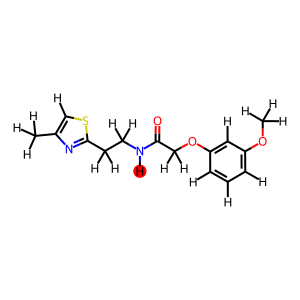

7.346865621082763
CHEMBL1204125
sixb


[15:36:06] ERROR: Problems encountered parsing data fields
[15:36:06] ERROR: moving to the beginning of the next molecule


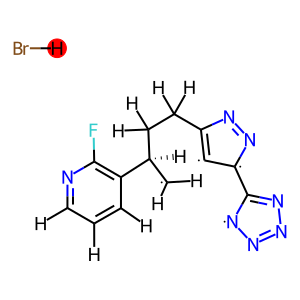

7.289763366490478
OTAVA_D0103331342
sixa


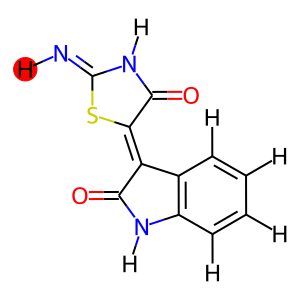

[15:36:06] ERROR: Problems encountered parsing data fields
[15:36:06] ERROR: moving to the beginning of the next molecule


3.4538960979248046
CHEMBL1991121
sixb


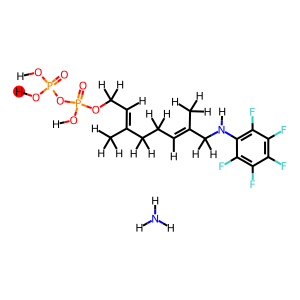

3.340455048776855
CHEMBL1309341
sixb


[15:36:06] ERROR: Problems encountered parsing data fields
[15:36:06] ERROR: moving to the beginning of the next molecule


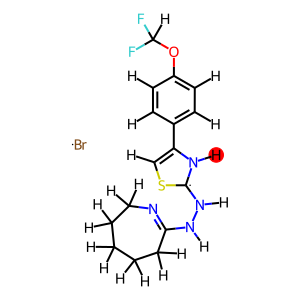

3.3132151342700205
OTAVA_D1786487
sixa


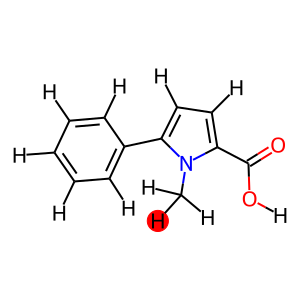

3.204478525043945
OTAVA_D4794773
sixa


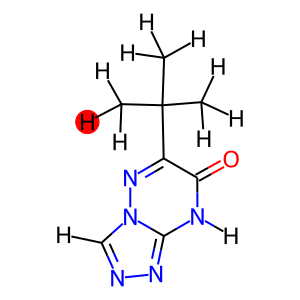

3.0994150377081295
OTAVA_D1999259
sixa


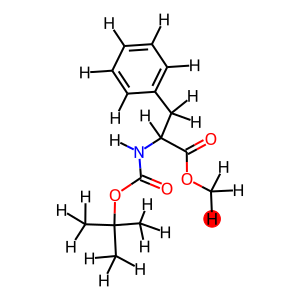

2.732842049647827
OTAVA_D1791982
sixa


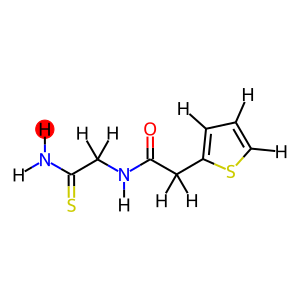

2.6967429828723146
DT5a_ATAKUB
fivea


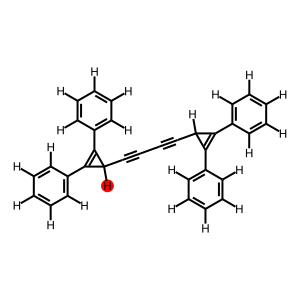

2.631871019584961


In [5]:
element = 'H'
element_dict = {'H': 1, 'N':7, 'C':6, 'O':8, 'S':16}
percentage = 100
number_of_mols = 10
dimension_desired = 2

df_2 = pd.read_pickle(f'./TRAIN_MODEL/{percentage}PredRetry/retry2_nodupe_testset.pkl')
df_DFT8K = pd.read_pickle(f'./TRAIN_MODEL/{percentage}PredRetry/retry_extra_with_shift.pkl')

df_DFT8K.rename(columns={'mol_id':'molecule_name', 'atom_type': 'type_int'}, inplace=True)
df_concatenated = pd.concat([df_DFT8K, df_2])

data_filtered = df_concatenated[df_concatenated['typeint'] == element_dict[element]]
data_filtered["Difference"] = abs(data_filtered["shift"] - data_filtered["predicted_shift"])
data_filtered.sort_values(['Difference'], ascending=False, inplace=True)
data_sample = data_filtered.head(number_of_mols)
m=()
for index, row in data_sample.iterrows():
    x = row['molecule_name']
    print(x)
    if x in DFT8K_mols:
        print('extra')
        x = x.replace('CHEMBL', '')
        worked = Chem.SDMolSupplier(f'./cleaned_testing_dataset/DFT8K/sdf/{x}.sdf', removeHs=False)
    if x in fivea_mols:
        print('fivea')
        worked = Chem.SDMolSupplier(f'./Data/cleaned_datasets/Data5a/Data5a_HCNF_scaled_nmredata/{x}.nmredata.sdf', removeHs=False)
    if x in fiveb_mols:
        print('fiveb')
        worked = Chem.SDMolSupplier(f'./Data/cleaned_datasets/Data5b/Data5b_HCNF_scaled_nmredata/{x}.nmredata.sdf', removeHs=False)
    if x in six_mols:
        print('sixa')
        worked = Chem.SDMolSupplier(f'./Data/cleaned_datasets/Data6/Data6_HCNF_scaled_nmredata/{x}.nmredata.sdf', removeHs=False)
    if x in sixb_mols:
        print('sixb')
        worked = Chem.SDMolSupplier(f'./Data/cleaned_datasets/Data6b/Data6b_new_rescaled/Data6b_{x}.nmredata.sdf', removeHs=False)
    if x in cyanamide_mols:
        print('cyanamide')
        worked = Chem.SDMolSupplier(f'./Data/cleaned_datasets/Raw_DATA/Cyanamide/{x}.nmredata.sdf', removeHs=False)
    if x in thioketone_mols:
        print('Thioketone')
        worked = Chem.SDMolSupplier(f'./Data/cleaned_datasets/Raw_DATA/Thioketone/{x}.nmredata.sdf', removeHs=False)
    m=worked[0]
    if dimension_desired == 2:
        rdCoordGen.AddCoords(m)
    highlight = int(row['atom_index'])
    mol_img = Draw.MolToImage(m, highlightAtoms=[highlight], highlightColor=(1, 0, 0))
    display(mol_img)
    print(row['Difference'])
    worked = () #clearence variable

In [1]:
import glob
bad_list = set()
for x in glob.glob('./Data/cleaned_datasets/Raw_DATA/Cyanamide/*.sdf'):
    
    worked = Chem.MolFromMolFile(x, removeHs=False)
    #m=worked[0]
    
    try:
        rdCoordGen.AddCoords(worked)
        #display(worked)
        print(x)
    except:
        print('<-----------------'+x)
        #bad_list.add(x)

print(len(bad_list))
#highlight = int(row['atom_index'])
#m.__sssAtoms = [highlight]
#pic = Draw.MolToImage(m, highlightAtoms=[highlight])    
#mol_img = Draw.MolToImage(m, highlightAtoms=[highlight], highlightColor=(1, 0, 0))


NameError: name 'Chem' is not defined

['CHEMBL20133312', 'CHEMBL20180708', 'CHEMBL20177033', 'CHEMBL20169077', 'CHEMBL20177585', 'CHEMBL20173371', 'CHEMBL10017857', 'CHEMBL20224401', 'CHEMBL20168430', 'CHEMBL20167564', 'CHEMBL20169104', 'CHEMBL20165596', 'CHEMBL20209321', 'CHEMBL20208820', 'CHEMBL20204242', 'CHEMBL20191616', 'CHEMBL20208131', 'CHEMBL30096629', 'CHEMBL20212723', 'CHEMBL20169260', 'CHEMBL20167875', 'CHEMBL20133324', 'CHEMBL20055530', 'CHEMBL20224319', 'CHEMBL20142240', 'CHEMBL20167804', 'CHEMBL20200810', 'CHEMBL20182608', 'CHEMBL20171030', 'CHEMBL20171501', 'CHEMBL20170712', 'CHEMBL10017858', 'CHEMBL10017855', '']
./cleaned_testing_dataset/DFT8K/sdf/20133312.sdf


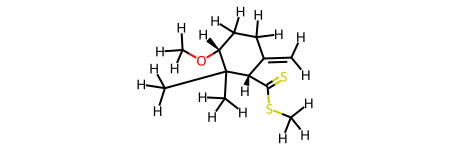

./cleaned_testing_dataset/DFT8K/sdf/20180708.sdf


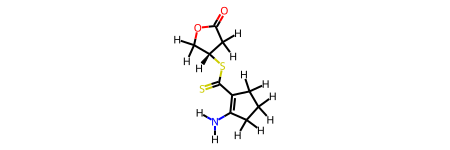

./cleaned_testing_dataset/DFT8K/sdf/20177033.sdf


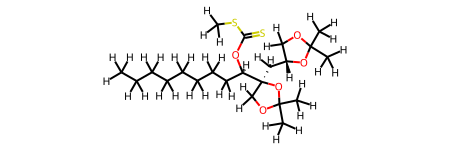

./cleaned_testing_dataset/DFT8K/sdf/20169077.sdf


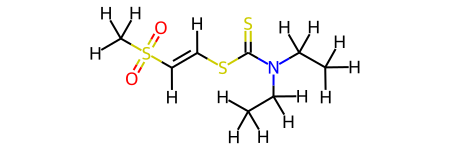

./cleaned_testing_dataset/DFT8K/sdf/20177585.sdf


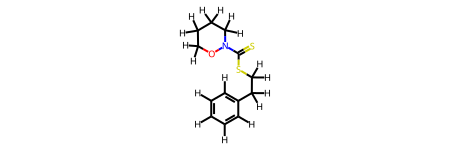

./cleaned_testing_dataset/DFT8K/sdf/20173371.sdf


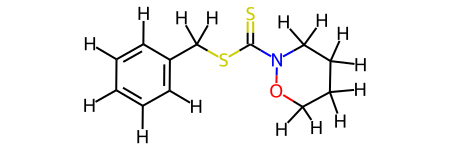

./cleaned_testing_dataset/DFT8K/sdf/10017857.sdf


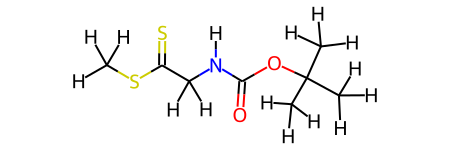

./cleaned_testing_dataset/DFT8K/sdf/20224401.sdf


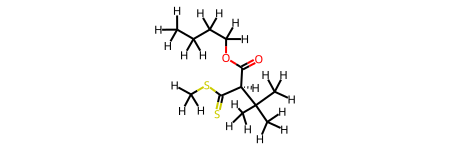

./cleaned_testing_dataset/DFT8K/sdf/20168430.sdf


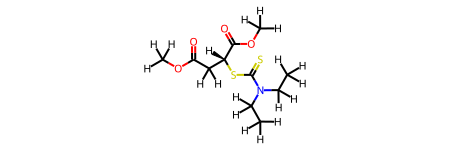

./cleaned_testing_dataset/DFT8K/sdf/20167564.sdf


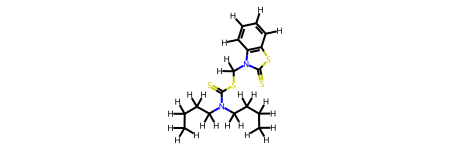

./cleaned_testing_dataset/DFT8K/sdf/20169104.sdf


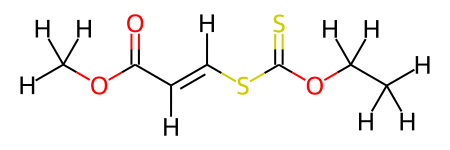

./cleaned_testing_dataset/DFT8K/sdf/20165596.sdf


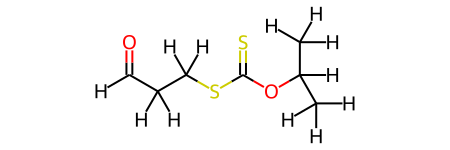

./cleaned_testing_dataset/DFT8K/sdf/20209321.sdf


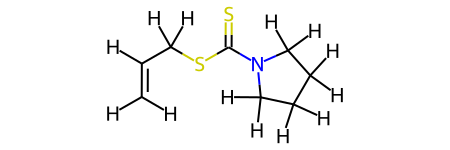

./cleaned_testing_dataset/DFT8K/sdf/20208820.sdf


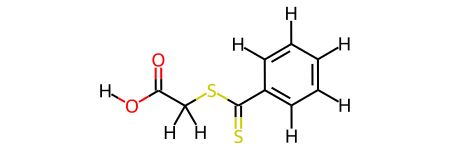

./cleaned_testing_dataset/DFT8K/sdf/20204242.sdf


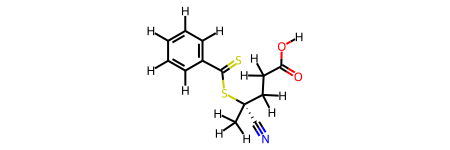

./cleaned_testing_dataset/DFT8K/sdf/20191616.sdf


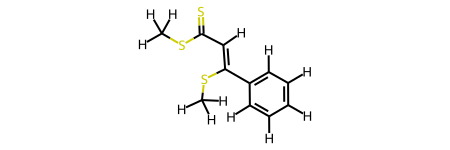

./cleaned_testing_dataset/DFT8K/sdf/20208131.sdf


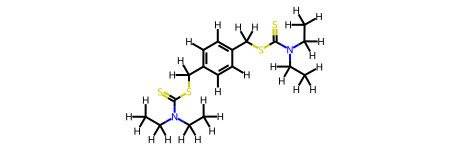

./cleaned_testing_dataset/DFT8K/sdf/30096629.sdf


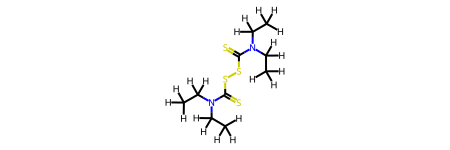

./cleaned_testing_dataset/DFT8K/sdf/20212723.sdf


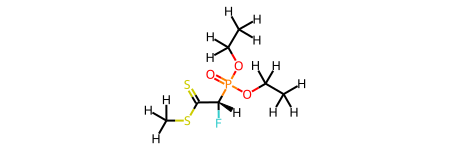

./cleaned_testing_dataset/DFT8K/sdf/20169260.sdf


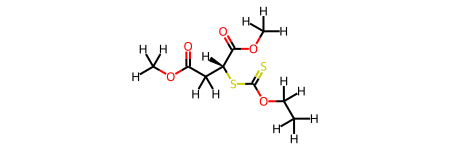

./cleaned_testing_dataset/DFT8K/sdf/20167875.sdf


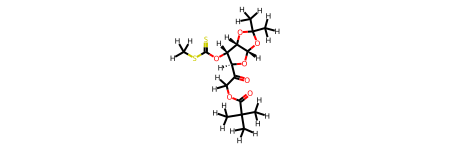

./cleaned_testing_dataset/DFT8K/sdf/20133324.sdf


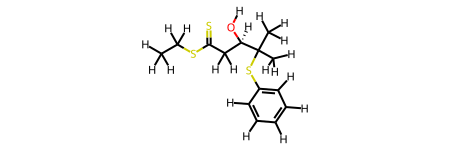

./cleaned_testing_dataset/DFT8K/sdf/20055530.sdf


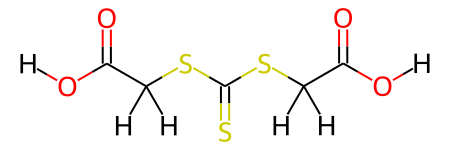

./cleaned_testing_dataset/DFT8K/sdf/20224319.sdf


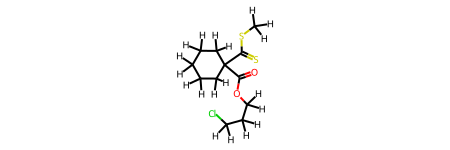

./cleaned_testing_dataset/DFT8K/sdf/20142240.sdf


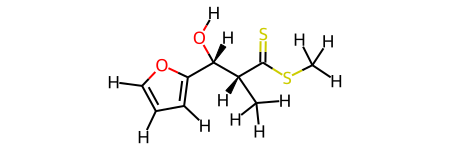

./cleaned_testing_dataset/DFT8K/sdf/20167804.sdf


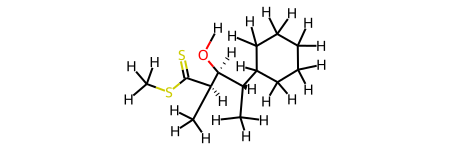

./cleaned_testing_dataset/DFT8K/sdf/20200810.sdf


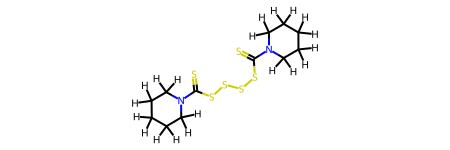

./cleaned_testing_dataset/DFT8K/sdf/20182608.sdf


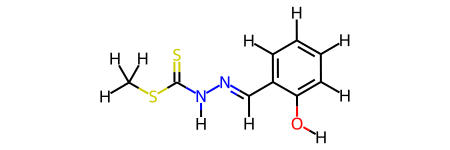

./cleaned_testing_dataset/DFT8K/sdf/20171030.sdf


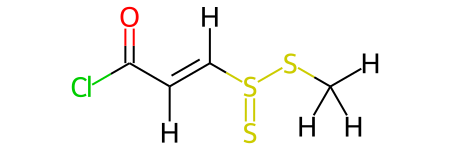

./cleaned_testing_dataset/DFT8K/sdf/20171501.sdf


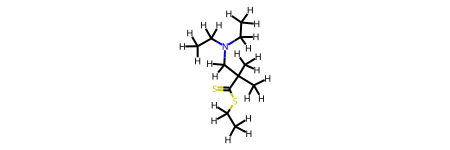

./cleaned_testing_dataset/DFT8K/sdf/20170712.sdf


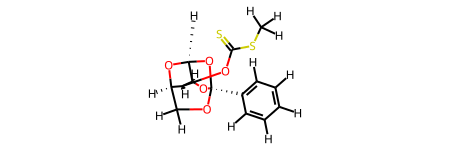

./cleaned_testing_dataset/DFT8K/sdf/10017858.sdf


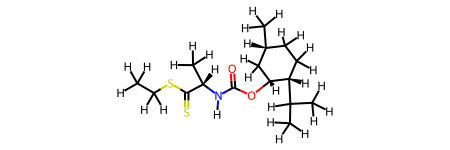

./cleaned_testing_dataset/DFT8K/sdf/10017855.sdf


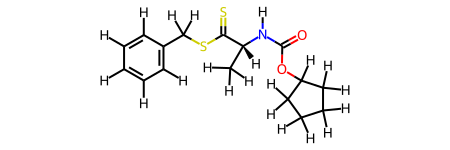

./cleaned_testing_dataset/DFT8K/sdf/.sdf


OSError: Bad input file ./cleaned_testing_dataset/DFT8K/sdf/.sdf

In [37]:
fivea_mols=[]
with open(f'cleaned_testing_dataset/DFT8K/thio_pureDFT8Kmatches.txt', 'r') as file:
    fivea_molecules = [p.strip() for p in file.read().split('\n')]
    for x in fivea_molecules:
        fivea_mols.append(x)
print(fivea_mols)
for x in fivea_mols:
    x=x.replace('CHEMBL', '')
    path = './cleaned_testing_dataset/DFT8K/sdf/'+str(x)+'.sdf'
    print(path)
    m=Chem.MolFromMolFile(str(path), removeHs=False)
    rdCoordGen.AddCoords(m)
    display(m)

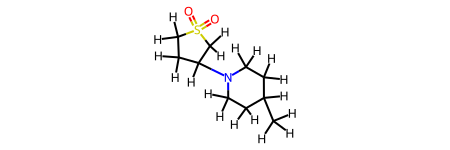

AttributeError: 'Mol' object has no attribute 'getProp'

In [15]:
path = './Data/cleaned_datasets/Data6/Data6_HCNF_scaled_nmredata/OTAVA_D0109070050.nmredata.sdf'
worked=Chem.SDMolSupplier(str(path), removeHs=False)
m=worked[0]
rdCoordGen.AddCoords(m)
display(m)
m.getProp['NMREDATA_ASSIGNMENT']

